In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import env 
import os
alpha = 0.05

In [5]:
# For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be),
# then give an example of what a true positive, true negative, type I and type II errors would look like. 
# Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as 
# more precise questions that could be tested.

# A type I error is when we reject the null hypothesis, but, in reality, the null hypothesis is true.
# A type II error is when we fail to reject the null hypothesis when it is actually false.

#             | H0 true      |   H0 false 
# Acccept H0  |True Negative |False Negative 
# Rejected H0 |False Positive|True Positive



In [ ]:
# When performing formal statistical hypothesis testing, the question being asked needs to be phrased as a null
# hypothesis and an alternative hypothesis. The null hypothesis, is the "status quo", and usually reflects no chang
# or no difference, while the alternative hypothesis says that there is a difference or change.

In [ ]:
# Hypothesis
# Has the network latency gone up since we switched internet service providers?
# cheaper networks go faster 
# Alternative Hypothesis 
# expensive network go faster
# Type I/Type II
#             | H0 true          |   H0 false 
# Acccept H0  |cheap did go fast |cheap didnt go fast 
# Rejected H0 |expensice was slow|cheap was fast



In [ ]:
# Hypothesis
# Is the website redesign any good?
# website got more views cause the new redisign 
# Alternative Hypothesis 
# website lost viewers
# Type I/Type II
#             | H0 true                    |   H0 false 
# Acccept H0  |website lost alot of viewrs |website gain more views 
# Rejected H0 |website was expectiong 3 time visits|website only got 1.2trime the visits

In [6]:
# Hypothesis 
# Is our television ad driving more sales?
# televesion 

In [7]:
## One Sample T-Test

In [10]:
####Comparing Means

In [12]:
# Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 
# A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days.
# A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 
# Use a .05 level of significance.

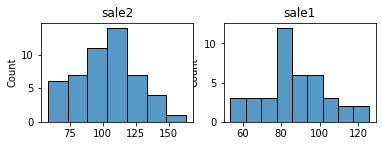

In [2]:
sa1=40
sa2=50
sam1=90
sam1_std=15
sam2_mean=100
sam2_std=20
sales=stats.norm(sam1,sam1_std)
sales2=stats.norm(sam2_mean,sam2_std)
sale1 = sales.rvs(sa1)
sale2 = sales2.rvs(sa2)

plt.subplot(222)
sns.histplot(sale1)
plt.title('sale1')
plt.subplot(221)
sns.histplot(sale2)
plt.title('sale2')
α = .05


In [3]:
sale1.mean(), sale2.mean()

(87.35842608270865, 103.47630361388012)

In [8]:
a, b = stats.levene(sale1, sale2)

In [9]:
b < α

True

In [10]:
t, p = stats.ttest_ind(sale1, sale2)
b < α

True

In [11]:
# Load the mpg dataset and use it to answer the following questions:
mpg = pd.DataFrame(data('mpg'))
mpg['eco'] = (mpg.cty + mpg.hwy)/2
twen = mpg[mpg.year == 2008].eco
nineteen = mpg[mpg.year == 1999].eco
c = 0.05
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,eco
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


<AxesSubplot:>

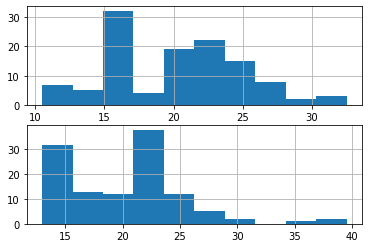

In [12]:
# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
plt.subplot(212)
nineteen.hist()

plt.subplot(211)
twen.hist()

In [97]:
twen.mean(), nineteen.mean()

(20.076923076923077, 20.22222222222222)

In [113]:
a, b = stats.levene(twen, nineteen)
b< c

False

In [119]:
# Are compact cars more fuel-efficient than the average car?
compact = mpg[mpg['class'] == 'compact'].eco
ave = mpg.eco.mean()
t, b = stats.ttest_1samp(compact, μth)
b/2 < α, t > 0

(True, True)

In [109]:
# Do manual cars get better gas mileage than automatic cars?
manual = mpg[mpg['trans'].str.contains('manual')].eco
auto = mpg[mpg['trans'].str.contains('auto')].eco
a,b=stats.levene(manual,auto)
b < α

False

In [120]:
t, b = stats.ttest_ind(manual, auto)
b < α, t > 0

(True, True)

In [27]:
# Use the telco_churn data. Does tenure correlate with monthly charges? What happens if you control
# for phone and internet service?
a=0.05
df = pd.read_csv('telco_churn.csv')
x = df.tenure
y = df.MonthlyCharges
r, p = stats.pearsonr(x,y)
r,p

(0.2478998562861525, 4.094044991483017e-99)

In [28]:
p < a

True

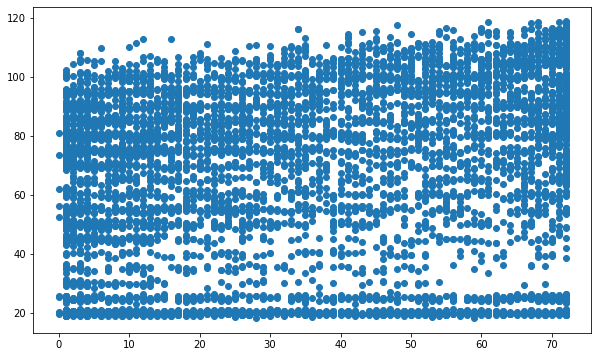

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.show()

In [30]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [34]:
#Total charges?
df =df.TotalCharges.str.replace(' ','0')
df.TotalCharges = df.TotalCharger.astype(float)
x = df.tenure
y = df.TotalCharges
plt.scatter(x,y)
r, p = stats.pearsonr(x,y)
r,p
plt.show()

AttributeError: 'Series' object has no attribute 'TotalCharges'

In [ ]:
phone = df[df.PhoneService == 'Yes']
no_phone = df[df.PhoneService == 'No']

In [50]:
def get_db_url(db, env_file=os.path.exists('env.py')):
    if env_file:
        user, password, host = (env.user, env.password, env.host)
        return f'mysql+pymysql://{user}:{password}@{host}/{db}'
    else:
        return False

In [17]:
# Use the employees database.
def get_db_url(db, env_file=os.path.exists('env.py')):
    if env_file:
        user, password, host = (env.user, env.password, env.host)
        return f'mysql+pymysql://{user}:{password}@{host}/{db}'
    else:
        return False

query = '''
        SELECT * FROM 
        dept_emp
        JOIN salaries USING (emp_no);
'''
sals = pd.read_csv('work.csv')
sals = sals.rename(columns={'from_date': 'emp_from_date', 'to_date': 'emp_to_date', 'from_date.1': 'sal_from_date', 'to_date.1': 'sal_to_date'})

In [18]:
sals.head()

,dept_no,dept_name,emp_no,dept_no.1,emp_from_date,emp_to_date,emp_no.1,birth_date,first_name,last_name,gender,hire_date,emp_no.2,salary,sal_from_date,sal_to_date
0,d001,Marketing,110039,d001,1991-10-01,9999-01-01,110039,1963-06-21,Vishwani,Minakawa,M,1986-04-12,110039,106491,2002-04-08,9999-01-01
1,d002,Finance,110114,d002,1989-12-17,9999-01-01,110114,1957-03-28,Isamu,Legleitner,F,1985-01-14,110114,83457,2002-01-10,9999-01-01
2,d003,Human Resources,110228,d003,1992-03-21,9999-01-01,110228,1958-12-02,Karsten,Sigstam,F,1985-08-04,110228,65400,2002-07-31,9999-01-01
3,d004,Production,110420,d004,1996-08-30,9999-01-01,110420,1963-07-27,Oscar,Ghazalie,M,1992-02-05,110420,56654,2002-02-02,9999-01-01
4,d005,Development,110567,d005,1992-04-25,9999-01-01,110567,1964-04-25,Leon,DasSarma,F,1986-10-21,110567,74510,2001-10-17,9999-01-01


In [35]:
# Is there a relationship between how long an employee has been with the company and their salary?
query = 'SELECT * FROM salaries LIMIT 100;'
sals = pd.read_csv('work.csv')
sals['hire_date'] = sals.from_date.str.slice(0,4).astype('int')
sals.head()
x = sals.hire_date
y = sals.salary
r,p = stats.pearsonr(x,y)
r,p

(-0.719714333145218, 0.028805130712219917)

In [36]:
p < α

True

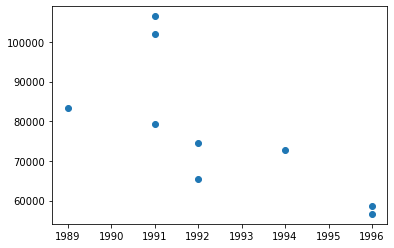

In [40]:
plt.scatter(x,y)
plt.show()

In [154]:
# Is there a relationship between how long an employee has been with the company and the number of titles 
# they have had?


In [42]:
# Use the sleepstudy data
df=data('sleepstudy')
df

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


r = 0.5352302262650255
p = 9.89409632221439e-15
We reject the null hypothesis


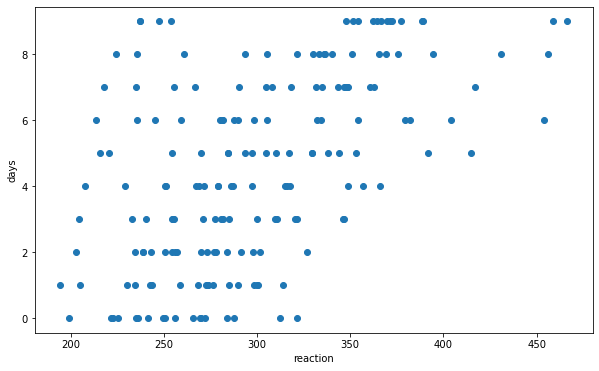

In [43]:
# Is there a relationship between days and reaction time?
x=df.Reaction
y=df.Days
r, p = stats.pearsonr(x,y)
print('r =', r)
print('p =', p)
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.xlabel('reaction')
plt.ylabel('days')
plt.show()

In [64]:
# Use the following contingency table to help answer the question of whether using a macbook and being a 
# codeup student are independent of each other.
# H0=codeup does not effect the used of macbook
# H1=codeup doesnt not effect the used of macbook
mac = pd.DataFrame([[49, 20], [1, 30]])
mac.columns = ['Codeup Student','Not Codeup Student']
mac.index = ['Uses a Macbook','Does not use a Macbook']
mac

,Codeup Student,Not Codeup Student
Uses a Macbook,49,20
Does not use a Macbook,1,30


In [65]:
chi2, pval, degf, expected = stats.chi2_contingency(table)
chi2, pval, degf, expected

(36.65264142122487,
 1.4116760526193828e-09,
 1,
 array([[34.5, 34.5],
        [15.5, 15.5]]))

In [68]:
# Choose another 2 categorical variables from the mpg dataset and perform a 
df=data('mpg')
df.nunique()
# chi2
# contingency table test with them. Be sure to state your null and alternative hypotheses.
a = pd.crosstab(mpg.drv, mpg.fl)
a

fl,c,d,e,p,r
drv,,,,,
4,0,2,6,20,75
f,1,3,1,25,76
r,0,0,1,7,17


In [69]:
chi2, pval, degf, expected = stats.chi2_contingency(a)
chi2, pval, degf, expected

(6.561829351267893,
 0.5845579584206677,
 8,
 array([[ 0.44017094,  2.2008547 ,  3.52136752, 22.88888889, 73.94871795],
        [ 0.45299145,  2.26495726,  3.62393162, 23.55555556, 76.1025641 ],
        [ 0.10683761,  0.53418803,  0.85470085,  5.55555556, 17.94871795]]))

In [74]:
# Use the data from the employees database to answer these questions:
url = get_db_url('employees')
query = ''' 
        select concat(first_name,' ',last_name)as 'Full Name',gender as 'Gender',dept_name as 'Department' from employees 
        join dept_emp using(emp_no)
        join departments using (dept_no);
        '''
df = pd.read_sql(query, url)
df2 = df[(df.Department == 'Sales') | (df.Department == 'Marketing')]
df2

,Full Name,Gender,Department
144419,Cristinel Bouloucos,F,Marketing
144420,Georgy Dredge,M,Marketing
144421,Berhard McFarlin,M,Marketing
144422,Lunjin Giveon,M,Marketing
144423,Yucel Auria,F,Marketing
...,...,...,...
331598,Guozhong Felder,M,Sales
331599,Gino Usery,M,Sales
331600,Nathan Ranta,F,Sales
331601,Rimli Dusink,F,Sales


In [77]:
# Is an employee's gender independent of whether an employee works in sales or marketing? 
# (only look at current employees)
a = pd.crosstab(df2.Gender, df2.Department)
a

Department,Marketing,Sales
Gender,,
F,8037,20854
M,12174,31391


In [80]:
chi2, pval, degf, expected = stats.chi2_contingency(a)
chi2, pval, degf, expected

(0.13113229997285258,
 0.7172609083882837,
 1,
 array([[ 8058.90472839, 20832.09527161],
        [12152.09527161, 31412.90472839]]))

In [81]:
pval < α

False

In [98]:
# Is an employee's gender independent of whether or not they are or have been a manager?
query = '''SELECT emp_no as 'Employees#', gender as 'Gender',IF (emp_no in (SELECT emp_no FROM dept_manager), True, False) AS 'Was_Manager' 
		FROM employees
        JOIN dept_emp USING (emp_no)
        JOIN dept_manager USING (emp_no)
        WHERE dept_emp.to_date > CURDATE();'''
df = pd.read_sql(query, url)
df

,Employees#,Gender,Was_Manager
0,110022,M,1
1,110039,M,1
2,110085,M,1
3,110114,F,1
4,110183,F,1
5,110228,F,1
6,110303,F,1
7,110344,F,1
8,110386,M,1
9,110420,M,1


In [100]:
q = pd.crosstab(df.Gender, df.Was_Manager)
q

Was_Manager,1
Gender,
F,13
M,11


In [110]:
chi2, pval, degf, expected = stats.chi2_contingency(q)
print('Observed\n')
print(q.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'pval  = {pval:.4f}')
print(f'degf  = {degf:.4f}')

Observed

[[13]
 [11]]
---
Expected

[[13.]
 [11.]]
---

chi^2 = 0.0000
pval  = 1.0000
degf  = 0.0000
